In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


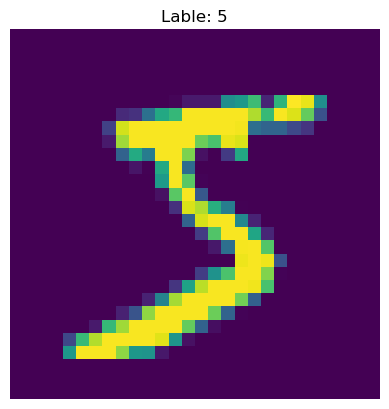

In [4]:
plt.imshow(x_train[0])
plt.title(f'Lable: {y_train[0]}')
plt.axis('off')
plt.show()

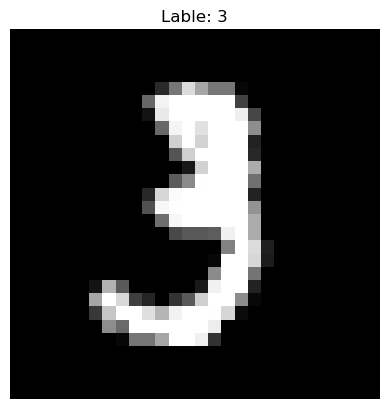

In [6]:
plt.imshow(x_train[10], cmap = 'gray')
plt.title(f'Lable: {y_train[10]}')
plt.axis('off')
plt.show()

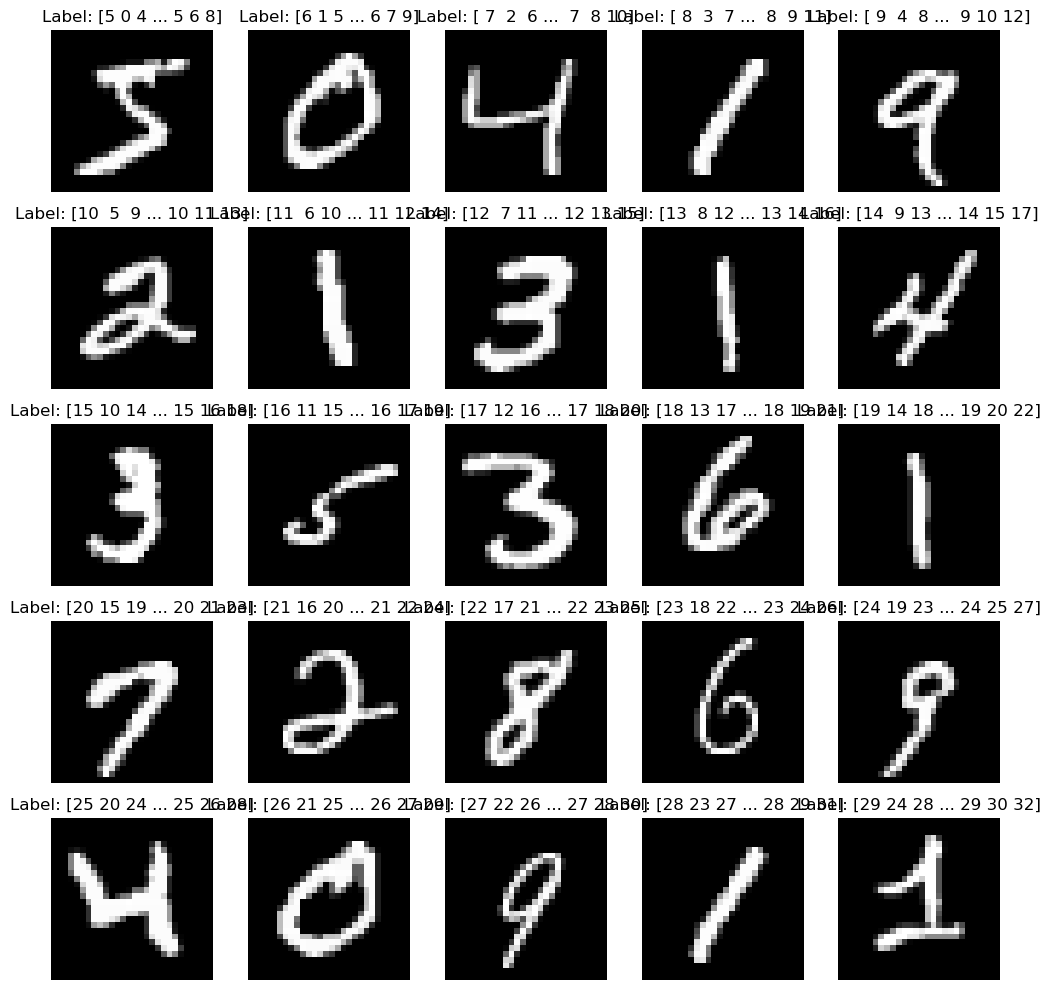

In [7]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(f'Label: {y_train + [i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

In [14]:

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattening the 28x28 images to 784
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          validation_split=0.25)


Epoch 1/10


D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7304 - loss: 3.5942 - val_accuracy: 0.9144 - val_loss: 0.3205
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9207 - loss: 0.2851 - val_accuracy: 0.9325 - val_loss: 0.2462
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9439 - loss: 0.1993 - val_accuracy: 0.9432 - val_loss: 0.2223
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9527 - loss: 0.1746 - val_accuracy: 0.9470 - val_loss: 0.1955
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9623 - loss: 0.1363 - val_accuracy: 0.9553 - val_loss: 0.1769
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9646 - loss: 0.1223 - val_accuracy: 0.9543 - val_loss: 0.1816
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9687 - loss: 0.1066 - val_accuracy: 0.9561 - val_loss: 0.1755
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9698 - loss: 0.1062 - val_accur

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\n Test Accuracy: {test_accuracy}')
print(f'\n Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9626 - loss: 0.1623

 Test Accuracy: 0.9664999842643738

 Test Loss: 0.14906124770641327


In [16]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.80065748e-16, 2.32530505e-11, 6.10844084e-11, ...,
        1.00000000e+00, 2.13654060e-11, 3.69872062e-08],
       [1.36179207e-16, 1.60151217e-06, 9.99998450e-01, ...,
        4.10564427e-09, 1.65099504e-10, 1.32011682e-22],
       [5.12993537e-11, 9.99131739e-01, 5.68116491e-07, ...,
        7.86356162e-04, 2.47819225e-05, 1.11104434e-07],
       ...,
       [8.93804388e-12, 2.24911068e-24, 2.66829857e-16, ...,
        2.80713305e-19, 4.00934785e-10, 2.16077236e-08],
       [2.92913805e-13, 8.72382620e-22, 3.51675302e-22, ...,
        2.54005614e-15, 5.56986957e-10, 2.45583713e-08],
       [5.14738252e-12, 1.90227146e-20, 4.02501459e-15, ...,
        6.93513557e-21, 8.26586629e-12, 5.39967581e-18]], dtype=float32)

In [17]:
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 973,    1,    0,    0,    1,    0,    2,    0,    2,    1],
       [   0, 1119,    1,    2,    0,    1,    2,    2,    8,    0],
       [   8,    0,  977,   12,    7,    2,    4,    5,   16,    1],
       [   0,    1,    2,  959,    0,   35,    0,    5,    4,    4],
       [   2,    0,    0,    1,  966,    0,    6,    2,    1,    4],
       [   5,    0,    1,    5,    2,  865,    2,    1,    4,    7],
       [  10,    2,    1,    0,    5,    6,  932,    0,    2,    0],
       [   3,    4,    9,    3,    0,    0,    0, 1001,    4,    4],
       [  10,    1,    2,    8,    5,    8,    4,    2,  929,    5],
       [   8,    3,    0,    4,   24,   11,    0,    8,    7,  944]],
      dtype=int64)

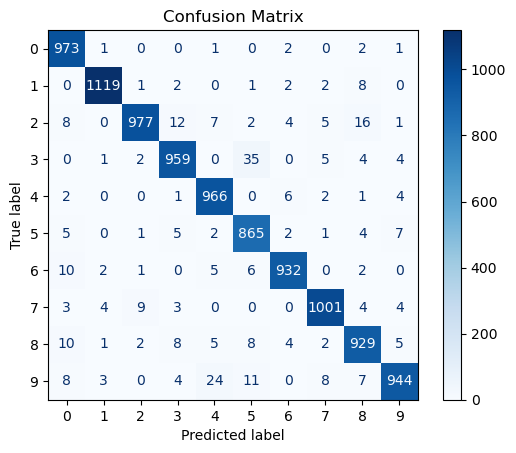

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()